# Аналитика в интернет-магазине

### Описание проекта
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.


### Содержание

- [Подготовка данных](#id-Подготовка_данных)
- [Анализ_данных](#id-Анализ_данных)
- [Вывод](#id-Вывод)


<div id='id-Подготовка_данных'/>

### Шаг 1.Подготовка данных.


In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import datetime as dt
import matplotlib.ticker as ticker
pd.set_option('display.max_colwidth', -1)



Откроем и изучим файл hypothesis для первой части проекта

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')
display(hypothesis)
hypothesis.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В датасете hypothesis содержится 5 столбцов и 9 строк. Пропущенных значений нет. Типы данных 'целые числа' для столбцов с оценками  и 'строчный' для наименования гипотез корректны.
Названия столбцов:

•	Hypothesis — краткое описание гипотезы;

•	Reach — охват пользователей по 10-балльной шкале;

•	Impact — влияние на пользователей по 10-балльной шкале;

•	Confidence — уверенность в гипотезе по 10-балльной шкале;

•	Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.


Откроем и изучим файлы orders и visitors для второй части проекта

In [4]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
display(orders.head())
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В датасете orders содержится 5 столбцов и 1197 строк. Пропущенных значений нет. Типы данных - 'целые числа'  и 'строчный'. Необходимо изменить строчный тип данных в столбце с датой на 'временной'.
Названия столбцов:

•	transactionId — идентификатор заказа;

•	visitorId — идентификатор пользователя, совершившего заказ;

•	date — дата, когда был совершён заказ;

•	revenue — выручка заказа;

•	group — группа A/B-теста, в которую попал заказ.



In [5]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
display(visitors.head())
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В датасете visitors содержится 3 столбца и 62 строки. Пропущенных значений нет. Типы данных - 'целые числа'  и 'строчный'.  Необходимо изменить строчный тип данных в столбце с датой на 'временной'.
Названия столбцов:

•	date — дата;

•	group — группа A/B-теста;

•	visitors — количество пользователей в указанную дату в указанной группе A/B-теста


Изменим тип данных в столбцах 'date' датафреймов orders и visitors на временной и проверим факт изменения.

In [6]:
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y-%m-%d')
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


В трех датафреймах данные достаточно чистые. Мы изменили тип данных в двух столбцах с датами на корректный.

<div id='id-Анализ_данных'/>

### Шаг 2.Анализ данных.


#### Часть 1. Приоритизация гипотез.

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [7]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
display(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2))


,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее приоритетными по фреймворку ICE получились гипотезы 8, 0, 7, т.к. есть определенная степень уверенности, что они окажут больше влияния на пользователей и потребуют меньше усилий. Меньше всего рекомендуются структурные изменения и изменения дизайна сайта в гипотезах 5, 3, 4, т.к. совсем мало уверенности в том, что они окажут какое-либо влияние на пользователей, но, например, гипотеза 3 потребует серьезных ресурсных затрат.

Применим фреймворк RICE для приоритизации гипотез.

In [8]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
display(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Согласно фреймворку RICE следует протестировать гипотезы 7, 2, 0, т.к. есть уверенность, что при минимальных затратах они дадут широкий охват аудитории и значимое влияние на нее. Не следует тестировать гипотезы 1, 5, 4, т.к. нет никакой уверенности, что при таком маленьком охвате пользователей и высокой степени затрат будет какое-либо значимое влияние на аудиторию. 

Проверим, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Добавим столбец с номером гипотезы для построения линейного графика сравнения фреймворков.

In [9]:
hypothesis['index'] = [0,1,2,3,4,5,6,7,8]
#display(hypothesis)
display(hypothesis[['Hypothesis', 'RICE', 'ICE', 'index']].sort_values(by='RICE', ascending=False).round(2))

,Hypothesis,RICE,ICE,index
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,11.20,7
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,7.00,2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,13.33,0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,8.00,6
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.20,8
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,1.12,3
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2.00,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,1.33,5
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,1.00,4


(0, 116)

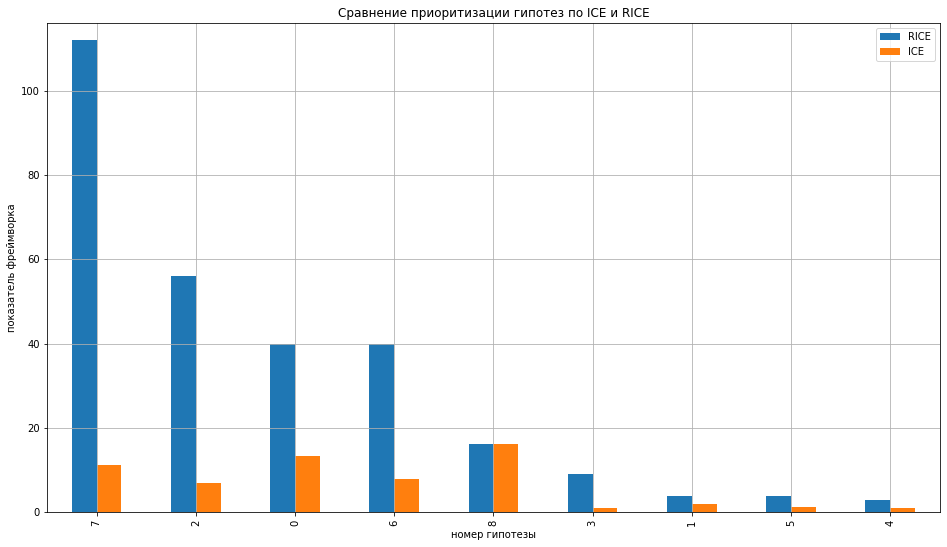

In [10]:
top = hypothesis[['RICE', 'ICE']].sort_values(by='RICE', ascending = False)
top.plot(kind='bar', title='Сравнение приоритизации гипотез по ICE и RICE', figsize=(16,9), grid=True, legend=True, alpha=1) 
plt.xlabel("номер гипотезы")
plt.ylabel("показатель фреймворка")
plt.ylim(0,116)


При применении фреймворка RICE показатели выросли за счет Reach, а приоритизация гипотез изменилась в пользу гипотезы 7 за счет, того, что ее тестирование может дать самый широкий охват (Reach=10). Тоже самое произошло с гипотезой 2. Гипотеза 0 спустилась со второго места на третье, т.к. ее охват недостаточно высок, несмотря на максимальное влияние. Гипотеза 6 оставалась на 4 позиции при использовании обоих фреймворков. Гипотеза 8 вылетела из лидеров на на пятое место, т.к. охват у нее самый минимальный, при это показатели обоих фреймворков оказались равны.
Гипотеза 4 показывает совсем маленькие баллы по всем параметрам в обоих фреймворках, что подтверждает сомнения по ее тестированию.
Мы предлагаем рассмотреть для тестирования гипотезы 7, 2, 0, 6, как наиболее перпесктивных с точки зрения фреймворков ICE и RICE.

#### Часть 2. Анализ A/B-теста

Мы провели A/B-тест и получили результаты в датасетах orders и visitors, которые необходимо проанализировать.

#### 1. Построим график кумулятивной выручки по группам.

Соберем кумулятивные данные в датафрейм cumulativeData:

Создаем массив уникальных пар значений дат и групп теста, удалим дубликаты.

In [11]:
datesGroups = orders[['date','group']].drop_duplicates()

Получаем агрегированные кумулятивные по дням данные о заказах 

In [12]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 

In [13]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединяем кумулятивные данные в одной таблице 

In [14]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

Переименуем столбцы объединенной таблицы.

In [15]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01  A     24      20      148579   719     
1 2019-08-01  B     21      20      101217   713     
2 2019-08-02  A     44      38      242401   1338    
3 2019-08-02  B     45      43      266748   1294    
4 2019-08-03  A     68      62      354874   1845    


Создаем датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А

In [16]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

Создаем датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B

In [17]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

Строим графики выручки отдельно по группам А и В

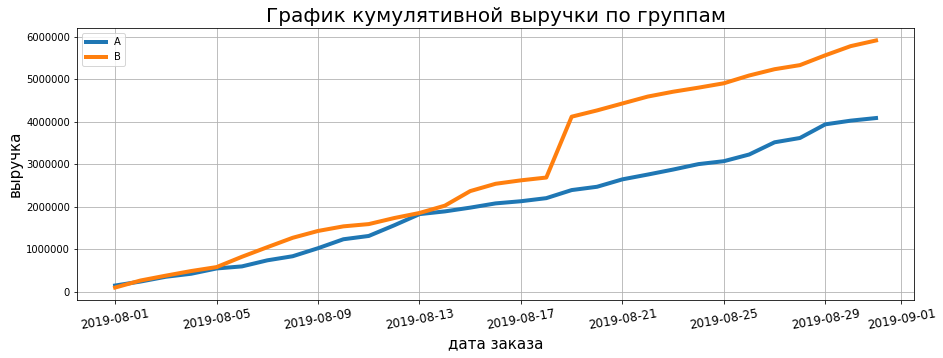

In [18]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A', linewidth = 4)
ax.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B', linewidth = 4)
ax.tick_params(axis='x', labelsize = 12, labelrotation=10)
plt.legend()
plt.title('График кумулятивной выручки по группам', fontsize=20)
plt.xlabel('дата заказа', fontsize=15)
plt.ylabel('выручка', fontsize=15)
plt.grid()
plt.show()

Выручка увеличивается, группа В показывает больше выручки. Более равномерный рост у группы А, у группы В есть резкий скачок с 2.8 до 4 миллионов, возможно, это дорогие заказы или большое количество заказов. Необходимо проанализировать этот выброс далее.

#### 2. Построим график кумулятивного среднего чека по группам, разделив кумулятивную выручку на кумулятивное число заказов.

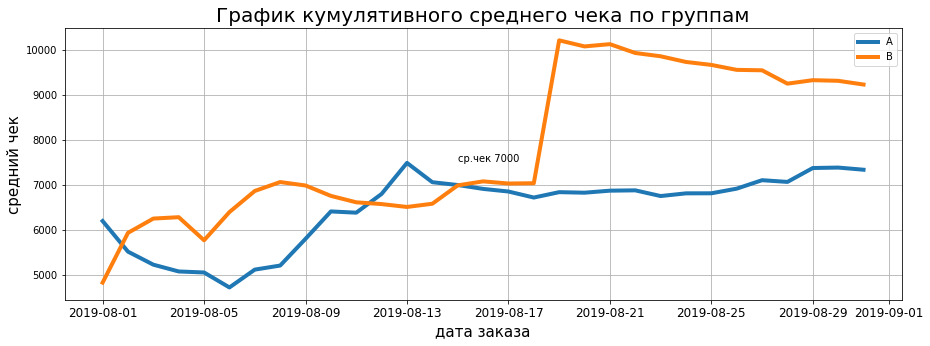

In [19]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A', linewidth = 4)
ax.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B', linewidth = 4)
ax.tick_params(axis='x', labelsize = 12, labelrotation=0)
plt.legend()
plt.title('График кумулятивного среднего чека по группам', fontsize=20)
plt.xlabel('дата заказа', fontsize=15)
plt.ylabel('средний чек', fontsize=15)
plt.text('2019-08-15', 7500, r'ср.чек 7000')
plt.grid(True)
plt.show()

Средний чек растет неравномерно в обеих группах. В группе В также в середине месяца резкий скачок от 7000 рублей до 10000 рублей, как и на графике с выручкой. Во второй половине месяца средний чек группы В намного выше, чем у А, но к концу он постепенно снижается. В этот же период средний чек группы А стабилизируется на 7000 рублях, хотя до этого чек падал с 6000 до 4000 рублей в первой половине тестирования.
Возможно, в группу B во второй половине теста попали крупные заказы. Нужно больше данных для стабилизации среднего чека.

#### 3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

Объединим данные по кумулятивной выручке обеих групп в один датафрейм.

In [20]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

Добавим ось Х в виде пунктирной линии.

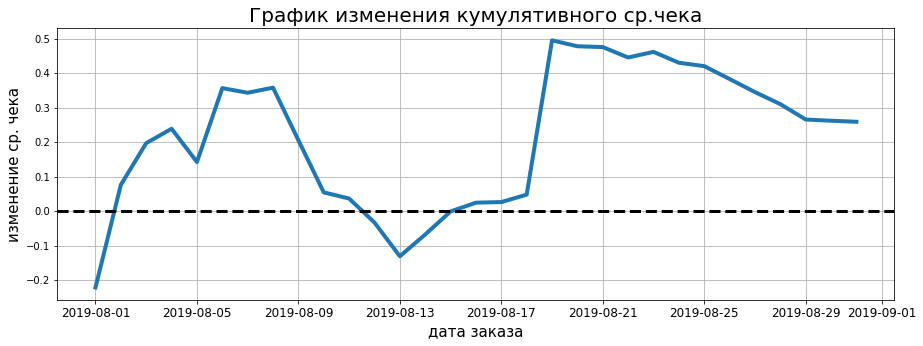

In [21]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, linewidth=4)
ax.tick_params(axis='x', labelsize = 12, labelrotation=0)
plt.axhline(y=0, color='black', linestyle='--', linewidth=3)
plt.title('График изменения кумулятивного ср.чека', fontsize=20)
plt.xlabel('дата заказа', fontsize=15)
plt.ylabel('изменение ср. чека', fontsize=15)
plt.grid()
plt.show()

График изменения сильно скачет, что говорит о резких выбросах из-за больших или дорогих заказов, которые необходимо найти.

#### 4. Построим график кумулятивной конверсии по группам. 

Находим кумулятивную конверсию

In [22]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

Создаем датафрейм с кумулятивной конверсией по группе А

In [23]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

Создаем датафрейм с кумулятивной конверсией по группе В

In [24]:
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Строим графики конверсии по группам.

Задаем масштаб осей с их минимальными и максимальными значениями.

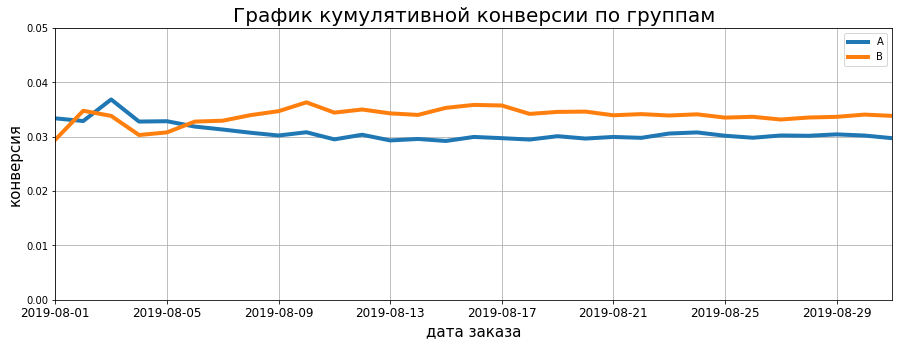

In [25]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A', linewidth=4)
ax.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B', linewidth=4)
ax.tick_params(axis='x', labelsize = 12, labelrotation=0)
plt.legend()
plt.title('График кумулятивной конверсии по группам', fontsize=20)
plt.xlabel('дата заказа', fontsize=15)
plt.ylabel('конверсия', fontsize=15)
plt.grid(True)

plt.axis(["2019-08-01", '2019-08-31', 0, 0.050])
plt.show()

В начале периода обе группы показывают небольшой скачок и падение, при этом группа А имеет большую конверсию, но затем группа А постепенно выравнивается по показателю 0.03, а группа В - по 0.035. В итоге кумулятивная конверсия группы В близка к 3.5%, а группы А - к 3%.


#### 5. Построим график относительного изменения кумулятивной конверсии группы B к группе A. 

Объединим данные с кумулятивной конверсией в один датафрейм.

In [26]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Строим график изменения кумулятивной конверсии

Добавим ось Х и горизонтальную линию


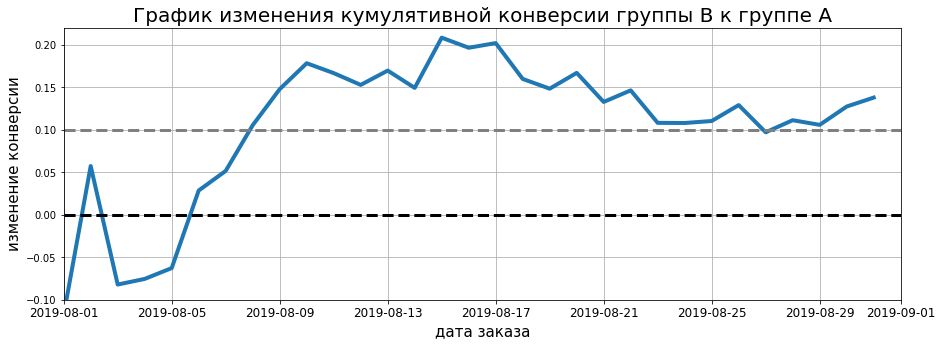

In [27]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, linewidth=4)
ax.tick_params(axis='x', labelsize = 12, labelrotation=0)
plt.title("График изменения кумулятивной конверсии группы B к группе A", fontsize=20)
plt.xlabel('дата заказа', fontsize=15)
plt.ylabel('изменение конверсии', fontsize=15)
plt.grid(True)

plt.axhline(y=0, color='black', linestyle='--', linewidth=3)
plt.axhline(y=0.1, color='grey', linestyle='--', linewidth=3)
plt.axis(["2019-08-01", '2019-09-01', -0.10, 0.22])
plt.show()

В начале периода у группы В были падения и значения конверсии меньше, чем у группы А, но затем конверсия В резко поднялась вверх и постепенно стала снижаться. Возможно, если убрать выбросы, то можно понять, на каком значении конверсия зафиксируется.

#### 6. Построим точечный график количества заказов по пользователям.

Создадим датафрейм с количеством заказов на пользователя, переименуем столбцы.

In [28]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsers.columns = ['visitorId','orders']
#display(ordersByUsers.sort_values(by='orders',ascending=False).head(5))

Построим точечную диаграмму числа заказов, x_values - это длина датафрейма, т.е. все значения по пользователям.

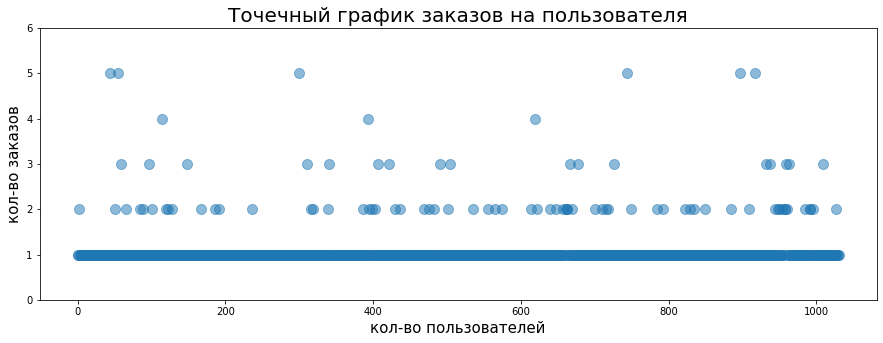

In [29]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(15,5))
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.5, s=100)
plt.title("Точечный график заказов на пользователя", fontsize=20)
plt.xlabel('кол-во пользователей', fontsize=15)
plt.ylabel('кол-во заказов', fontsize=15)
plt.ylim(0,6)
plt.show()

Большинство пользователей делают по 1 заказу, реже по 2-4, также есть выбросы на 5 и более заказов на пользователя. Но какова их доля непонятно. Это следует выяснить по перцентилям. 

#### 7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. 

In [30]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


5% пользователей делают по 2 заказа, 1% пользователей делает по 4 заказа.
Логично принять 2 заказа на одного пользователя за границу для определения аномальных пользователей. Все, кто заказывал больше 2х раз, будут отсеяны.

#### 8. Построим точечный график стоимости заказов. 

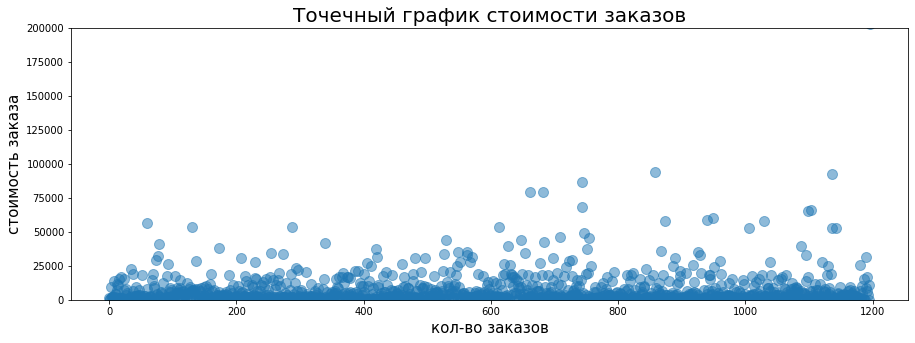

In [31]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders['revenue'], alpha=0.5, s=100)
plt.ylim(0,200000)
plt.title("Точечный график стоимости заказов", fontsize=20)
plt.xlabel('кол-во заказов', fontsize=15)
plt.ylabel('стоимость заказа', fontsize=15)
plt.show()

Стоимость большинства заказов  до 25 000 рублей. Согласно графику можно отсеять аномальные заказы свыше 30 000 рублей. Но сначала проверим стоимость по перцентилям.

#### 9. Посчитаем 95-й и 99-й перцентили стоимости заказов. 

In [32]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


5% заказов стоят по 28 000 рублей, только 1% - 58 233 рублей. Проведем границу для аномальных пользователей на стоимости заказа 28 000 рублей.

#### 10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

Подготовим данные для нахождения статистической значимости.

In [33]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

display(data.head(5))


,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные по группам, где сохраним количество заказов на пользователя.

In [34]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

Создадим переменные sampleA и sampleB, где каждому пользователю соотвествует количество заказов или нули, если заказов не было. 

In [35]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


Применим непараметрический тест Уилкоксона-Манна-Уитни, который проранжирует две выборки по порядку от меньшего к большему и сравнит ранги одних и тех же значений, попавших в обе выборки.
Типичный сдвиг - разница между рангами одних и тех же значений одинакова. Нетипичный сдвиг по рангу - изменение. Сумма рангов таких сдвигов и выступает значением критерия. Чем он выше — тем больше вероятность, что для этих выборок интересующая нас величина различается.

Число элементов sampleA и sampleB — это количество пользователей, а сумма всех элементов — количество заказов. Чтобы найти конверсию, нужно поделить сумму заказов на число пользователей, т.е. найти среднее в выборке. 

Перед проверкой гипотезы найдем относительный прирост конверсии группы B = конверсия группы B / конверсия группы A - 1

In [36]:
print('Прирост конверсии группы В: ', "{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

Прирост конверсии группы В:  0.138


Проверим гипотезу, что конверсии обеих групп А и В равны друг другу.

Формируем нулевую гипотезу:

H₀ = "конверсия группы А равна конверсии группы В"¶.

Из H₀ формулируем альтернативную гипотезу: H₁ = "конверсия группы А не равна конверсии группы В. Уровень статистической значимости установим 5%.


In [37]:
alpha = .05

results = stats.mannwhitneyu(sampleA, sampleB)
    
print('p-значение: ', "{0:.3f}".format(results.pvalue))
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима'")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-значение:  0.008
Отвергаем нулевую гипотезу: разница статистически значима'


Мы видим, что p-value ниже критического уровня статистической значимости 0.05, поэтому мы 'отвергаем нулевую гипотезу: разница статистически значима'.
При этом относительный прирост конверсии группы В составляет 13,8%, что подтверждает возможность различия конверсий между группами.
##### Поэтому можно сделать вывод, что по  'cырым' данным различия в конверсих А и В есть.

#### 11.	Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Также найдем относительную разницу среднего чека между А и В.

In [38]:
print('Разница ср.чека: ', "{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


Разница ср.чека:  0.259


Проверим гипотезу, что средние чеки обеих групп А и В равны друг другу.

Формируем нулевую гипотезу:

H₀ = "ср.чек группы А равен ср.чеку группы В"¶.

Из H₀ формулируем альтернативную гипотезу: H₁ = "ср.чек группы А не равен ср.чеку группы В. Уровень статистической значимости установим 5%.

In [39]:
alpha = .05

results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
    
print('p-значение: ', "{0:.3f}".format(results.pvalue))
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима'")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-значение:  0.365
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


P-value выше уровня значимости 0.05, поэтому 'не получилось отвергнуть нулевую гипотезу: вывод о различии сделать нельзя'. Хотя средний чек группы В значительно выше чека группы А - почти на 26%.
##### По 'сырым данным' вывод о различии ср.чека между группами А и В делать нельзя.

Метод mannwhitneyu() ранжирует две выборки, а затем сравнивает ранги значений, разница между рангами должна быть одинакова. Чем больше случаев неодинаковой разницы, тем вероятней, что выборки различны.

Разница в ср.чеке в 25.9% не имеет статистической значимости, возможно, потому что в выборках есть пользователи, которые не делали заказов, или в группе В могли быть очень дорогие случайные заказы, которые повлияли на общий итог по расчету среднего чека, возможно, из-за этого он завышен. Тест же установил, что таких случаев немного, в целом разница между чеками в обеих группах одинакова.


#### 12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. 

Примем за аномальных пользователей тех, кто совершил от 2х заказов или совершил заказ дороже 30 000 рублей, тем самым уберем 5% пользователей с заказами в количестве 2х и стоимостью 28 000 рублей, а также 1-5% пользователей с 4мя заказами и стоимостью 52 000 рублей.
Создадим срезы пользователей с заказами больше 2х и дороже 30 000 рублей и объединим их в одну таблицу.

In [40]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
display(abnormalUsers.head(5))

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64

Выясним количество аномальных пользователей

In [41]:
print('Кол-во аномальных пользователей: ', abnormalUsers.shape)

Кол-во аномальных пользователей:  (68,)


Cчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. 

Создадим выборки количества заказов по пользователям по группам.

In [42]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)


Применим непараметрический тест Уилкоксона-Манна-Уитни  и проверим прирост конверсии группы В

In [43]:
print('Прирост конверсии по очищенным данным: ', "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


Прирост конверсии по очищенным данным:  0.172


Проверим гипотезу, что конверсии обеих групп А и В равны друг другу (по очищенным данным).

Формируем нулевую гипотезу:

H₀ = "конверсия группы А равна конверсии группы В"¶.

Из H₀ формулируем альтернативную гипотезу: H₁ = "конверсия группы А не равна конверсии группы В. Уровень статистической значимости установим 5%.

In [44]:

alpha = .05

results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
    
print('p-значение  по очищенным данным: ', "{0:.3f}".format(results.pvalue))
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима'")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")


p-значение  по очищенным данным:  0.007
Отвергаем нулевую гипотезу: разница статистически значима'


По очищенным данным p-value почти не изменилось, значение ниже критического уровня статистической значимости 0.05, поэтому мы 'отвергаем нулевую гипотезу: разница статистически значима'.
Относительный прирост конверсии группы В по очищенным данным выше результата по 'cырым' данным и составляет 17,2%, что подтверждает возможность различия конверсий между группами.

#### 13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Также найдем относительную разницу среднего чека между А и В по 'очищенным данным'.

In [45]:
print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

-0.023


Проверим гипотезу, что средние чеки обеих групп А и В равны друг другу (по 'очищенным данным').

Формируем нулевую гипотезу:

H₀ = "ср.чек группы А равен ср.чеку группы В"¶.

Из H₀ формулируем альтернативную гипотезу: H₁ = "ср.чек группы А не равен ср.чеку группы В. Уровень статистической значимости установим 5%.

In [46]:

alpha = .05

results = stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])
    
print('p-значение  по очищенным данным: ', "{0:.3f}".format(results.pvalue))
    
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима'")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")


p-значение  по очищенным данным:  0.360
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


P-value по очищенным данным почти не изменилось, выше уровня значимости 0.05, поэтому 'не получилось отвергнуть нулевую гипотезу: вывод о различии сделать нельзя'. Но средний чек группы В изменился и получился ниже чека группы А - на 2.3%. Аномальные данные значительно повлияли на результат, ср.чек группы В снизился с 26% до -2.3%. Теперь небольшая разница среднего чека подтверждает вывод теста Уилкоксона-Манна-Уитни, что нельзя сделать вывод о различии ср.чека групп А и В.

#### Построим график кумулятивной выручки

Убираем аномальных пользователей при создании датафрейма по датам и группам

In [158]:
datesGroups_pure = orders[np.logical_not(orders['visitorId'].isin(abnormalUsers))][['date','group']].drop_duplicates()



Далее повторяем шаги по собиранию выручки по датам и разделению по группам.

In [159]:

ordersAggregated_pure = datesGroups_pure.apply(lambda x: orders[np.logical_not(orders['visitorId'].isin(abnormalUsers))][np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated_pure = datesGroups_pure.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
cumulativeData_pure = ordersAggregated_pure.merge(visitorsAggregated_pure, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData_pure.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeRevenueA_pure = cumulativeData_pure[cumulativeData_pure['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB_pure = cumulativeData_pure[cumulativeData_pure['group']=='B'][['date','revenue', 'orders']]



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


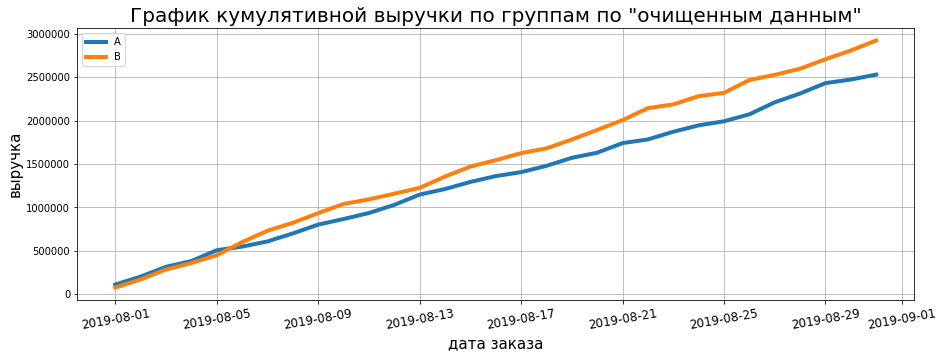

In [160]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(cumulativeRevenueA_pure['date'], cumulativeRevenueA_pure['revenue'], label='A', linewidth = 4)
ax.plot(cumulativeRevenueB_pure['date'], cumulativeRevenueB_pure['revenue'], label='B', linewidth = 4)
ax.tick_params(axis='x', labelsize = 12, labelrotation=10)
plt.legend()
plt.title('График кумулятивной выручки по группам по "очищенным данным"', fontsize=20)
plt.xlabel('дата заказа', fontsize=15)
plt.ylabel('выручка', fontsize=15)
plt.grid()
plt.show()

График кумулятивной выручки по 'очищенным данным' более ровный без резких скачков и падений. В Выручка группы В растет равномерно вверх и опережает группу А, возможно, из-за более высокой конверсии.

#### 14. Примем решение по результатам теста 
Варианты решений: 

1) Остановить тест, зафиксировать победу одной из групп. 

2) Остановить тест, зафиксировать отсутствие различий между группами. 

3) Продолжить тест.


•	Есть статистически значимое различие по конверсии между группами А и В и по «сырым», и по данным после фильтрации аномалий;

•	Нет статистически значимого различия по среднему чеку между группами А и В ни по «сырым», ни по данным после фильтрации аномалий;

•	График изменения кумулятивной конверсии между группами А и В говорит, что результаты группы B лучше группы A. Конверсия группы В показывает значимый прирост от 13 до 17% и по "сырым", и по данным после фильтрации аномалий;

•	График различия среднего чека говорит о том, что результаты группы B нестабильны, из-за падения в первой половине тестирования и резкого роста во второй. Возможно, необходимо дополнительное время, чтобы стабилизировать и зафиксировать ср.чек группы В. На данным момент согласно данным после фильтрации аномалий ср.чек группы В ниже чека группы А на 2.3%.


Исходя из обнаруженных фактов:
##### тест следует продолжить для того чтобы получить дополнительные данные 
для определения группы-победителя. Необходимо выровнять ср.чек группы В. Сейчас мы видим перспективы его фиксации на уровне, аналогичном группе А или немного его превышающим. Учитывая, что конверсия уже стабилизируется на уровне значительно превышающем конверсию группу А. Более того, график кумулятивной выручки показывает стабильной рост по группе В.

<div id='id-Вывод'/>

### Вывод.


Проведя анализ списка гипотез для увеличения выручки и результатов A/B-теста данных гипотез, мы пришли к следующим выводам:

##### Для приоритизации гипотез
мы использовали фреймворки ICE и RICE. Наиболее приоритетными по фреймворку ICE получились гипотезы 8, 0, 7, т.к. есть определенная степень уверенности, что они окажут больше влияния на пользователей и потребуют меньше усилий. Меньше всего рекомендуются структурные изменения и изменения дизайна сайта в гипотезах 5, 3, 4, т.к. совсем мало уверенности в том, что они окажут какое-либо влияние на пользователей, но, например, гипотеза 3 потребует серьезных ресурсных затрат.

При примении фреймворка RICE показатели выросли за счет Reach, а приоритизация гипотез изменилась в пользу гипотезы 7 за счет, того, что ее тестирование может дать самый широкий охват (Reach=10). Тоже самое произошло с гипотезой 2. Гипотеза 0 спустилась со второго места на третье, т.к. ее охват недостаточно высок, несмотря на максимальное влияние. 

Гипотеза 6 оставалась на 4 позиции при использовании обоих фреймворков. Гипотеза 8 вылетела из лидеров на на пятое место, т.к. охват у нее самый минимальный, при это показатели обоих фреймворков оказались равны.

Гипотеза 4 показывает совсем маленькие баллы по всем параметрам в обоих фреймворках, что подтверждает сомнения по ее тестированию.

Мы предлагаем рассмотреть для тестирования гипотезы 7, 2, 0, 6, как наиболее перспективные с точки зрения фреймворков ICE и RICE.

##### При проведении анализ A/B-теста

мы выяснили следующее:
- Выручка увеличивается, группа В показывает больше выручки. Более равномерный рост у группы А, у группы В есть резкий скачок с 2.8 до 4 миллионов, возможно, это дорогие заказы или большое количество заказов;
- Средний чек растет неравномерно в обеих группах. В группе В также в середине месяца резкий скачок от 7000 рублей до 10000 рублей, как и на графике с выручкой. Во второй половине месяца средний чек группы В намного выше, чем у А, но к концу он постепенно снижается. В этот же период средний чек группы А стабилизируется на 7000 рублях, хотя до этого чек падал с 6000 до 4000 рублей в первой половине тестирования. Возможно, в группу B во второй половине теста попали крупные заказы. Нужно больше данных для стабилизации среднего чека;
- График кумулятивной конверсии похож на зеркальный относительно показателя конверсии 0.032. В начале периода обе группы показывают резкий скачок и падение, затем группа А постепенно выравнивается по показателю 0.034, а группа В - по 0.030. В итоге кумулятивная конверсия группы В близка к 3.4%, а группы А - к 3%;
- Согласно точечному графику количества заказов на одного пользователя можно сделать вывод, что большинство пользователей делают по 1 заказу, реже по 2-4, также есть выбросы на 5 и более заказов на пользователя. По методу персентилей мы рассчитали, что 5% пользователей делают по 2 заказа, 1% пользователей делает по 4 заказа;
- Согласно точечному графику стоимость большинства заказов  до 25 000 рублей. При этом 5% заказов стоят по 28 000 рублей, только 1% - 58 233 рублей;
- В качестве аномальных пользователей были исключены все, кто заказывает больше 2х раз и заказы стоимостью больше 30 000 рублей;
- Для определения статистической значимости был проведен непараметрический тест Уилкоксона-Манна-Уитни;
- Статистическая значимость различий в конверсии между группами по "сырым" данным равна 0.008, по "очищенным" - 0.007;
- Прирост конверсии группы В по отношению группе А составляет по "сырым" данным - (+13,8%), по "очищенным" - (+17,2%);
- Статистическая значимость различий в среднем чеке заказа между группами А и В составляет по "сырым" данным - 0.365, по "очищенным" - 0.360
- Относительное различие в среднем чеке между группами А и В составляет по "сырым" данным - (+25,9%), по "очищенным" данным - (-2.3%);
- Есть статистически значимое различие по конверсии между группами А и В и по «сырым», и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами А и В ни по «сырым», ни по данным после фильтрации аномалий;
- График изменения кумулятивной конверсии между группами А и В говорит, что результаты группы B лучше группы A. Конверсия группы В показывает значимый прирост от 13 до 17% и по "сырым", и по данным после фильтрации аномалий;
- График различия среднего чека говорит о том, что результаты группы B нестабильны, из-за падения в первой половине тестирования и резкого роста во второй. Возможно, необходимо дополнительное время, чтобы стабилизировать и зафиксировать ср.чек группы В. На данным момент согласно данным после фильтрации аномалий ср.чек группы В ниже чека группы А на 2.3%;
- Исходя из вышесказанного, тест следует продолжить для того чтобы получить дополнительные данные для определения группы-победителя. Необходимо выровнять ср.чек группы В. Сейчас мы видим перспективы его фиксации на уровне, аналогичном группе А или немного его превышающим. Учитывая, что конверсия уже стабилизируется на уровне значительно превышающем конверсию группу А. Более того, график кумулятивной выручки показывает стабильной рост по группе В.